In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM

from statsmodels.tsa.stattools import adfuller

In [ ]:
dataframe = pd.read_csv('BTC-USD.csv')
dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409
1823,2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965
1824,2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850
1825,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9565695129
1826,2023-06-19,26380.005859,26565.085938,26333.376953,26518.960938,26518.960938,9489839104


In [ ]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)
wiki.head()

,edit_count,mean_sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025
2009-04-07,0.000000,0.000000,0.000
2009-04-08,0.000000,0.000000,0.000
2009-04-09,0.000000,0.000000,0.000
2009-04-10,0.000000,0.000000,0.000


In [ ]:
temp = []
for data in dataframe['Date']:
  data = datetime.strptime(data, "%Y-%m-%d").date()
  temp.append(data)
dataframe['Date'] = temp
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-19,6742.390137,6822.500000,6709.919922,6769.939941,6769.939941,4057029888
1,2018-06-20,6770.759766,6821.560059,6611.879883,6776.549805,6776.549805,3888640000
2,2018-06-21,6780.089844,6810.939941,6715.169922,6729.740234,6729.740234,3529129984
3,2018-06-22,6737.879883,6747.080078,6006.600098,6083.689941,6083.689941,5079810048
4,2018-06-23,6090.100098,6224.819824,6071.810059,6162.479980,6162.479980,3431360000
...,...,...,...,...,...,...,...
1822,2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409
1823,2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965
1824,2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850
1825,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9565695129


In [ ]:
def isStationary(s):
  s = s.dropna()
  result = adfuller(s, autolag='AIC')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

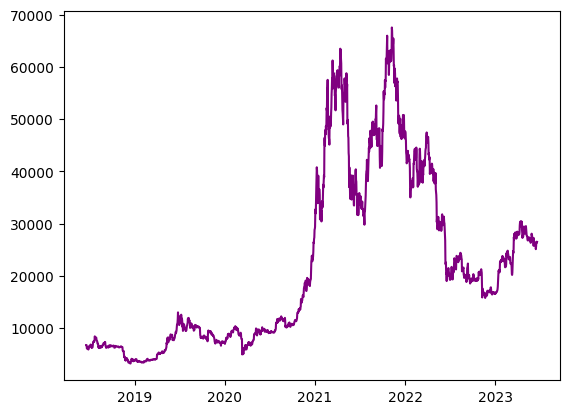

In [ ]:
time = dataframe['Date']
close = dataframe['Close']
plt.plot(time,close, color='purple')

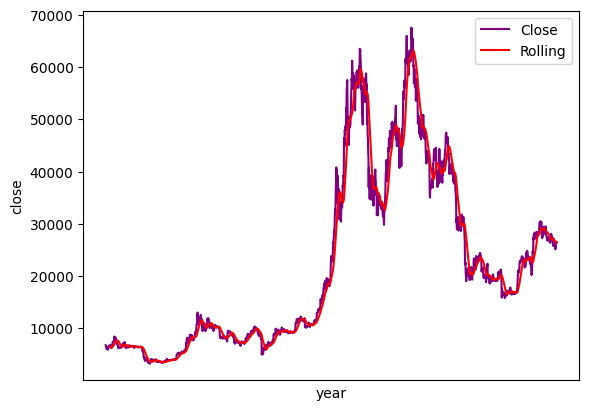

In [ ]:
#Noise removal of time series
close = close.rolling(20).mean()
plt.xlabel("year")
plt.ylabel("close")
plt.xticks(range(0, len(time), 365), time[::365], rotation= 45)
plt.plot(time, dataframe['Close'], color='purple')
plt.plot(time, close, color='red')
plt.legend(['Close','Rolling'])
plt.show()

In [ ]:
isStationary(close)
# p value is less than 0.05 then data is stationary

ADF Statistic: -2.048254
p-value: 0.265824
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


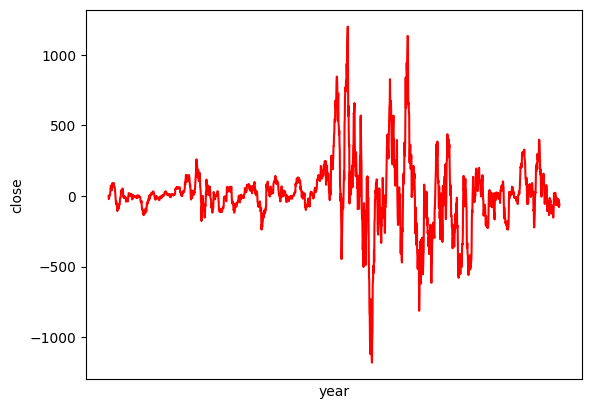

ADF Statistic: -4.793913
p-value: 0.000056
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
close_stationary = close - close.shift(1)
plt.xlabel("year")
plt.ylabel("close")
plt.xticks(range(0, len(time), 365), time[::365], rotation= 45)
plt.plot(time, close_stationary, color='red')
plt.show()
isStationary(close_stationary)

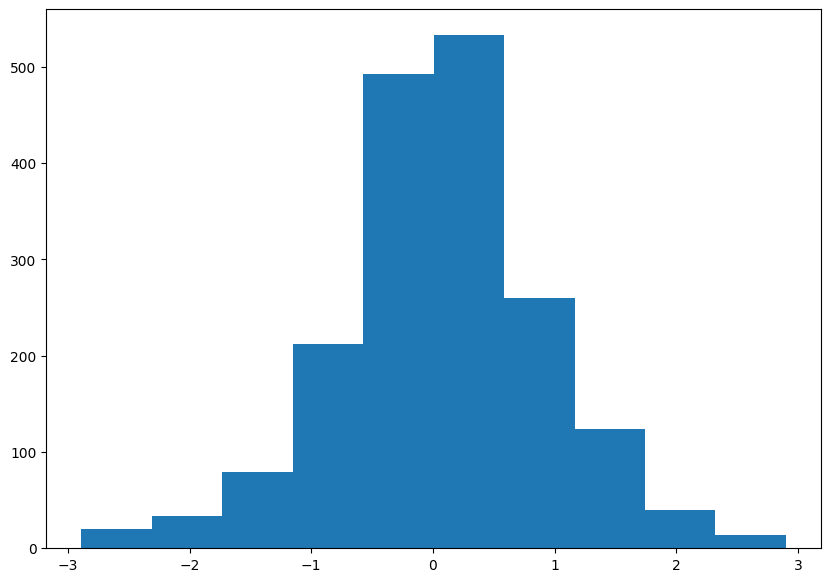

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
close_diff = close_stationary/close*100
plt.hist(close_diff)
plt.show()

In [ ]:
dataframe['tomorrow'] = close.shift(-1)
dataframe['yesterday'] = dataframe['Close'].shift(1)
dataframe['close_stationary'] = close_stationary
dataframe = dataframe.dropna()
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume,tomorrow,yesterday,close_stationary
20,2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920,6415.857495,6773.879883,-1.409497
21,2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080,6399.105981,6741.750000,-22.329981
22,2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904,6406.361987,6329.950195,-16.751514
23,2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112,6410.140479,6394.709961,7.256006
24,2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064,6415.284985,6228.810059,3.778491
...,...,...,...,...,...,...,...,...,...,...
1821,2023-06-14,25920.257813,26041.800781,24902.152344,25124.675781,25124.675781,14265717766,26626.641406,25918.728516,-67.576562
1822,2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409,26599.596875,25124.675781,-57.144824
1823,2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965,26520.848340,25576.394531,-27.044531
1824,2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850,26450.364746,26327.462891,-78.748535


In [ ]:
dataframe.reset_index(inplace=True)
dataframe = dataframe.drop(['index'], axis=1)
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,tomorrow,yesterday,close_stationary
0,2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920,6415.857495,6773.879883,-1.409497
1,2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080,6399.105981,6741.750000,-22.329981
2,2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904,6406.361987,6329.950195,-16.751514
3,2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112,6410.140479,6394.709961,7.256006
4,2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064,6415.284985,6228.810059,3.778491


In [ ]:
alpha = 2
today = pd.Series(dataframe['Close'])
tomorrow = pd.Series(dataframe['tomorrow'])

target =[]
for i in range(0,len(today)):
  if(today[i]-tomorrow[i]<-alpha/100*today[i]):
    target.append(0)
  elif(today[i]-tomorrow[i]>alpha/100*today[i]):
    target.append(2)
  else:
    target.append(1)
dataframe['target'] =pd.Series(target)
dataframe

# dataframe['target'] = (dataframe['close'] > dataframe['yesterday']).astype(int)
# dataframe['target'] = dataframe['target'].shift(1)
# dataframe = dataframe.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,tomorrow,yesterday,close_stationary,target
0,2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920,6415.857495,6773.879883,-1.409497,2
1,2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080,6399.105981,6741.750000,-22.329981,1
2,2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904,6406.361987,6329.950195,-16.751514,1
3,2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112,6410.140479,6394.709961,7.256006,0
4,2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064,6415.284985,6228.810059,3.778491,0
...,...,...,...,...,...,...,...,...,...,...,...
1801,2023-06-14,25920.257813,26041.800781,24902.152344,25124.675781,25124.675781,14265717766,26626.641406,25918.728516,-67.576562,0
1802,2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409,26599.596875,25124.675781,-57.144824,0
1803,2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965,26520.848340,25576.394531,-27.044531,1
1804,2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,26510.675781,11090276850,26450.364746,26327.462891,-78.748535,1


In [ ]:
dataframe['target'].value_counts()

2    720
0    632
1    454
Name: target, dtype: int64

In [ ]:
dataframe.set_index(['Date'],inplace=True,drop=True)
dataframe

,Open,High,Low,Close,Adj Close,Volume,tomorrow,yesterday,close_stationary,target
Date,,,,,,,,,,
2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920,6415.857495,6773.879883,-1.409497,2
2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080,6399.105981,6741.750000,-22.329981,1
2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904,6406.361987,6329.950195,-16.751514,1
2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112,6410.140479,6394.709961,7.256006,0
2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064,6415.284985,6228.810059,3.778491,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-14,25920.257813,26041.800781,24902.152344,25124.675781,25124.675781,14265717766,26626.641406,25918.728516,-67.576562,0
2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409,26599.596875,25124.675781,-57.144824,0
2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965,26520.848340,25576.394531,-27.044531,1


In [ ]:
dataframe = dataframe.merge(wiki, left_index=True, right_index=True)
dataframe

,Open,High,Low,Close,Adj Close,Volume,tomorrow,yesterday,close_stationary,target,edit_count,mean_sentiment,neg_sentiment
2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920,6415.857495,6773.879883,-1.409497,2,4.633333,-0.390263,0.609135
2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080,6399.105981,6741.750000,-22.329981,1,4.766667,-0.428260,0.629135
2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904,6406.361987,6329.950195,-16.751514,1,4.666667,-0.427947,0.629135
2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112,6410.140479,6394.709961,7.256006,0,4.466667,-0.434290,0.632839
2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064,6415.284985,6228.810059,3.778491,0,3.866667,-0.469647,0.657400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,26505.923828,26770.289063,26339.314453,26480.375000,26480.375000,11015551640,26883.884082,26508.216797,-32.460547,1,0.200000,-0.033450,0.083333
2023-06-10,26481.761719,26531.044922,25501.835938,25851.240234,25851.240234,19872933189,26838.328613,26480.375000,-45.129297,0,0.133333,-0.033264,0.066667
2023-06-11,25854.031250,26203.439453,25668.986328,25940.167969,25940.167969,10732609603,26772.167285,25851.240234,-45.555469,0,0.166667,-0.000299,0.066667
2023-06-12,25934.285156,26087.919922,25675.197266,25902.500000,25902.500000,11677889997,26751.362793,25940.167969,-66.161328,0,0.166667,-0.000299,0.066667


In [ ]:
dataframe['target'].isna().sum()

0

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=730, step=90):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
def getError(target, predictions):
  # Calculate accuracy
  accuracy = accuracy_score(target, predictions)

  # Calculate precision
  precision = precision_score(target, predictions, average='macro')

  # Calculate recall
  recall = recall_score(target, predictions, average='macro')

  # Calculate F1 score
  f1 = f1_score(target, predictions, average='macro')

  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")


In [ ]:
predictors = ['close_stationary','edit_count', 'neg_sentiment', 'mean_sentiment']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, min_samples_split=300, random_state=1)
predsRandomForest = backtest(dataframe,model,predictors)

In [ ]:
getError(predsRandomForest['target'], predsRandomForest['predictions'])

Accuracy: 0.7086834733893558
Precision: 0.6505413613256751
Recall: 0.6374845704753961
F1 Score: 0.6120323707268753


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.01, n_estimators=8)
predsXG = backtest(dataframe, model, predictors)


In [ ]:
getError(predsXG['target'], predsXG['predictions'])

Accuracy: 0.7170868347338936
Precision: 0.674435531788473
Recall: 0.6576115810794709
F1 Score: 0.6469047017533196
